# IBM Capstone Final Project

## PROJECT TITLE: Locating the Desirable Locations for New Business to Setup Office.

In [92]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import requests
import json
import seaborn as sns
from pandas.io.json import json_normalize
%matplotlib inline

In [93]:
df_price = pd.read_excel("D:/Coursera/urban-rental-market-survey-data-average-rents-urban-centres-2019.xlsx", 1, header=None)
df_price.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Private Row (Townhouse) and Apartment Average ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Loyer moyen des maisons en rangée et apparteme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,October 2019 - octobre 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Province,Centre,Zone,Neighbourhood\nQuartier,Dwelling\nType \nType de\nlogement,Bachelor \nStudios,NaN,1\nBedroom \n1 chambre,NaN,2\nBedroom \n2\nchambres,NaN,3\nBedroom\n+ \n3\nchambres\n+,NaN,Total \nTous les\nlog.,NaN
5,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,St. John's East ~ St. John's Est,Row / En\nbande,**,',$827,c,$903,b,**,',$1114,c
6,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,St. John's East ~ St. John's Est,Apt &\nOther /\nApp. &\nautres,$669,b,$855,a,$1056,a,$986,a,$953,a
7,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,St. John's East ~ St. John's Est,Total,$669,b,$854,a,$1054,a,$1060,a,$957,a
8,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,Total,Row / En\nbande,**,',$827,c,$903,b,**,',$1114,c
9,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,Total,Apt &\nOther /\nApp. &\nautres,$669,b,$855,a,$1056,a,$986,a,$953,a


In [94]:
df_price.drop([0,1,2,3], inplace=True)
df_price.reset_index(drop=True, inplace=True)

In [95]:
df_price.drop(df_price.columns[[5,6,7,8,9,10,11,12,14]], axis=1, inplace=True)
df_price.head()

,0,1,2,3,4,13
0,Province,Centre,Zone,Neighbourhood\nQuartier,Dwelling\nType \nType de\nlogement,Total \nTous les\nlog.
1,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,St. John's East ~ St. John's Est,Row / En\nbande,$1114
2,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,St. John's East ~ St. John's Est,Apt &\nOther /\nApp. &\nautres,$953
3,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,St. John's East ~ St. John's Est,Total,$957
4,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,Total,Row / En\nbande,$1114


In [96]:
df_price.columns = df_price.iloc[0]
df_price.head()

,Province,Centre,Zone,Neighbourhood\nQuartier,Dwelling\nType \nType de\nlogement,Total \nTous les\nlog.
0,Province,Centre,Zone,Neighbourhood\nQuartier,Dwelling\nType \nType de\nlogement,Total \nTous les\nlog.
1,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,St. John's East ~ St. John's Est,Row / En\nbande,$1114
2,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,St. John's East ~ St. John's Est,Apt &\nOther /\nApp. &\nautres,$953
3,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,St. John's East ~ St. John's Est,Total,$957
4,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,Total,Row / En\nbande,$1114


In [97]:
df_price.drop([0], inplace=True)
df_price.reset_index(drop=True, inplace=True)
df_price.head()

,Province,Centre,Zone,Neighbourhood\nQuartier,Dwelling\nType \nType de\nlogement,Total \nTous les\nlog.
0,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,St. John's East ~ St. John's Est,Row / En\nbande,$1114
1,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,St. John's East ~ St. John's Est,Apt &\nOther /\nApp. &\nautres,$953
2,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,St. John's East ~ St. John's Est,Total,$957
3,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,Total,Row / En\nbande,$1114
4,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,Total,Apt &\nOther /\nApp. &\nautres,$953


In [98]:
df_price.rename(columns={'Neighbourhood\nQuartier':'Neighbourhoods', 'Dwelling\nType \nType de\nlogement':'Dwelling', 'Total \nTous les\nlog.':'Avg_Price'}, inplace=True)
df_price.head()

,Province,Centre,Zone,Neighbourhoods,Dwelling,Avg_Price
0,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,St. John's East ~ St. John's Est,Row / En\nbande,$1114
1,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,St. John's East ~ St. John's Est,Apt &\nOther /\nApp. &\nautres,$953
2,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,St. John's East ~ St. John's Est,Total,$957
3,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,Total,Row / En\nbande,$1114
4,Nfld.Lab./T.-N.-L.,St. John's,St. John's East ~ St. John's Est,Total,Apt &\nOther /\nApp. &\nautres,$953


In [99]:
df_price['Province'].unique()

array(['Nfld.Lab./T.-N.-L.', 'N.S./N.-É.', 'N.B./N.-B.', 'Que/Qc',
       'Ont./Ont.', 'Man./Man.', 'Sask./Sask.', 'Alta/Alb.', 'B.C./C.-B.',
       'CMA Total /\nTotal RMR', 'Canada\n(50,000+)', nan,
       "© 2020 Canada Mortgage and Housing Corporation / © 2020 Société canadienne d'hypothèques et de logement",
       'Source: CMHC (Rental Market Survey) / Source: SCHL (Enquête sur les logements locatifs)',
       'The following letter codes are used to indicate the reliability of the estimates / Les lettres suivantes indiquent le degré de fiabilité des données estimatives :',
       'a - Excellent (0 > cv > 2.5), b- Very good (2.5 < cv > 5), c - Good (5 < cv > 7.5), d - Fair (Use with Caution) (7.5 < cv > 10) a - Excellent (0 > cv > 2,5), b - Très bon (2,5 < cv > 5), c - Bon (5 < cv > 7,5), d - Passable (utiliser avec prudence) (7,5 < cv > 10)',
       '** Data suppressed to protect confidentiality or data not statistically reliable / ** Donnée non fournie pour des raisons de confid

In [100]:
df_price = df_price[df_price['Province']=='Ont./Ont.']
df_price = df_price[df_price['Dwelling']=='Total']

In [101]:
df_price['Centre'].unique()

array(['Barrie', 'Belleville', 'Brantford', 'Guelph', 'Hamilton',
       'Kingston', 'Kitchener -\nCambridge -\nWaterl', 'London',
       'St. Catharines -\nNiagara', 'St. Catharines\n- Niagara', 'Oshawa',
       'Ottawa', 'Peterborough', 'Greater\nSudbury /\nGrand Sudbur',
       'Thunder Bay', 'Toronto', 'Windsor', 'Total'], dtype=object)

In [102]:
df = df_price.loc[df_price['Centre'].isin(['Toronto', 'Oshawa'])]
df.reset_index(drop=True, inplace=True)

In [103]:
df = df[df['Zone']!='Total']
df = df[df['Neighbourhoods']!='Total']
df.drop(['Dwelling'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [104]:
df['Avg_Price'] = df['Avg_Price'].str.split('$').str[1]
df.replace('?', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [105]:
df['Neighbourhoods'] = df['Neighbourhoods'].str.split(' ~').str[0]
df['Zone'] = df['Zone'].str.split(' ~').str[0]
df['Province'].replace('Ont./Ont.', 'Ontario', inplace=True)

In [106]:
df.dtypes

0
Province          object
Centre            object
Zone              object
Neighbourhoods    object
Avg_Price         object
dtype: object

In [107]:
df['Zone'] = df['Zone'].astype(str)
df['Avg_Price'] = df['Avg_Price'].astype(int)

In [108]:
df.to_excel("D:/Coursera/House_Leasing_Price_&_Location.xlsx")

In [109]:
df_gta = pd.read_excel("D:/Coursera/House_Leasing_Price_&_Location_with_coordinates.xlsx")

In [110]:
df_gta = df_gta.sort_values('Neighbourhoods', ascending=True)
df_gta.reset_index(drop=True, inplace=True)
df_gta.head()

,Latitude,Longitude,Province,Centre,Zone,Neighbourhoods,Average Price
0,43.788074,-79.283964,Ontario,Toronto,Scarborough,Agincourt,1352
1,43.850757,-79.021099,Ontario,Toronto,Ajax,Ajax,1318
2,43.604020,-79.540029,Ontario,Toronto,Etobicoke,Alderwood,1320
3,43.670832,-79.404308,Ontario,Toronto,Toronto,Annex,1698
4,44.006605,-79.449865,Ontario,Toronto,Aurora,Aurora,1338


In [111]:
df_gta.shape

(154, 7)

In [112]:
df_gta.dtypes

Latitude          float64
Longitude         float64
Province           object
Centre             object
Zone               object
Neighbourhoods     object
Average Price       int64
dtype: object

### Observe the numbers of neighbourhoods for every price range

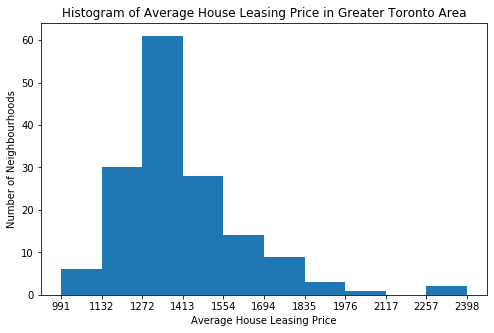

In [113]:
count, bin_edges = np.histogram(df_gta['Average Price'])
df_gta['Average Price'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Average House Leasing Price in Greater Toronto Area')
plt.ylabel('Number of Neighbourhoods') 
plt.xlabel('Average House Leasing Price')
plt.show()

In [114]:
bins = np.linspace(df_gta['Average Price'].min(),df_gta['Average Price'].max(), num = 11)
df_gta['Price Level'] = pd.cut(df_gta['Average Price'], bins, labels=['Low Level-1', 'Low Level-2', 'Low-Mid Level-1', 'Low-Mid Level-2', 'Mid Level-1', 'Mid Level-2', 'Mid-High Level-1', 'Mid-High Level-2', 'High Level-1', 'High Level-2'], include_lowest=True).astype(str)
df_gta.head()

,Latitude,Longitude,Province,Centre,Zone,Neighbourhoods,Average Price,Price Level
0,43.788074,-79.283964,Ontario,Toronto,Scarborough,Agincourt,1352,Low-Mid Level-1
1,43.850757,-79.021099,Ontario,Toronto,Ajax,Ajax,1318,Low-Mid Level-1
2,43.604020,-79.540029,Ontario,Toronto,Etobicoke,Alderwood,1320,Low-Mid Level-1
3,43.670832,-79.404308,Ontario,Toronto,Toronto,Annex,1698,Mid Level-2
4,44.006605,-79.449865,Ontario,Toronto,Aurora,Aurora,1338,Low-Mid Level-1


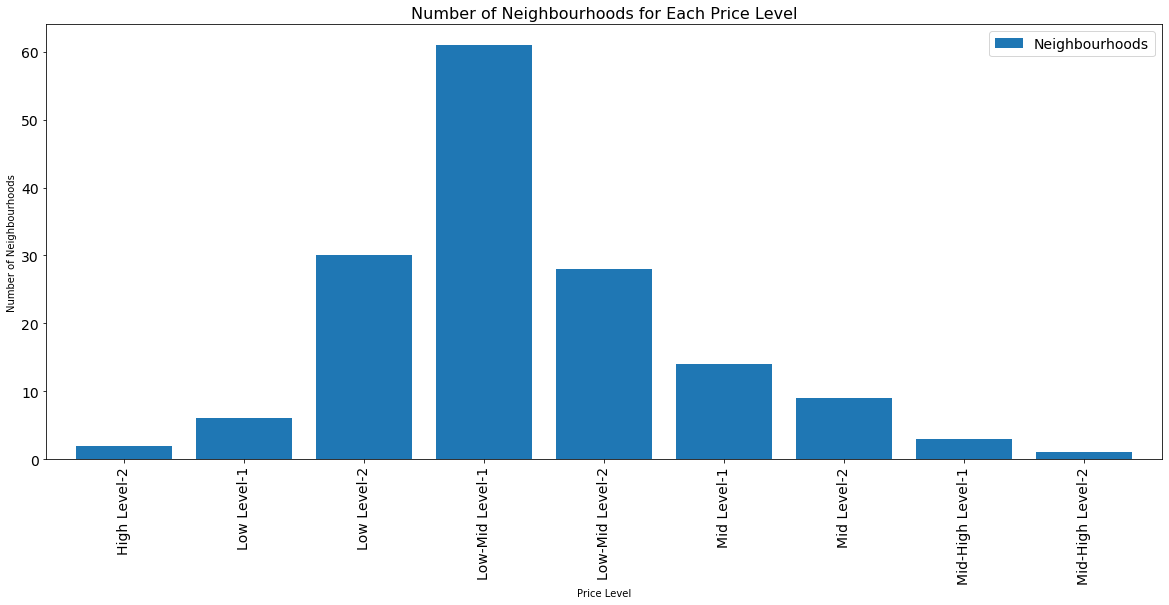

In [158]:
ax = df_gta[['Price Level', 'Neighbourhoods']].groupby('Price Level').count().plot(kind='bar', figsize=(20,8), width=0.8, fontsize=14)
ax.set_facecolor('white')
ax.set_ylabel('Number of Neighbourhoods')
ax.set_xlabel('Price Level')
ax.set_title("Number of Neighbourhoods for Each Price Level",fontsize=16)
ax.legend(fontsize=14)

### Check if all the neighbourhoods' locations are correct.

In [116]:
map_gta= folium.Map(location=[43.6532, -79.3832], zoom_start = 9)
for lat, lng, price, neighborhood, pricelevel in zip(df_gta['Latitude'], df_gta['Longitude'], df_gta['Average Price'], df_gta['Neighbourhoods'], df_gta['Price Level']):
    label = '{}, {}, {}'.format(neighborhood, price, pricelevel)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_gta)  
    
map_gta

### Use Foursquare API to get the surrounding venues that are within 1000m of each Neighbourhood with a maximum of 100 venues

In [117]:
CLIENT_ID = 'SZY0YIRWFDF2RH2PMX2EOEPSKBTSMPFN412W2AO1TSQEVA5G'
CLIENT_SECRET = 'ZIGAFT3H25JLZW5MLXCH5XQRIKBPZXEVXCI2NFIERGFDTWBO'
VERSION = '20180605'
LIMIT = 100
radius = 1000

In [118]:
def getNearbyVenues(names, latitudes, longitudes, price, pricelevel, radius=750):
    
    venues_list=[]
    for name, lat, lng, price, pricel in zip(names, latitudes, longitudes, price, pricelevel):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name,
            pricel,
            price,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhoods',
                  'Price Level',
                  'Average Price',
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [119]:
gta_venues = getNearbyVenues(names=df_gta['Neighbourhoods'],
                                 latitudes=df_gta['Latitude'],
                                 longitudes=df_gta['Longitude'],
                                 price=df_gta['Average Price'],
                                 pricelevel=df_gta['Price Level']
                                )

Agincourt
Ajax
Alderwood
Annex
Aurora
Banbury-Don Mills
Bathurst Manor
Bay Street Corridor
Bayview Village
Bedford Park-Nortown
Beechborough-Greenbrook
Bendale
Birchcliffe-Cliffside
Black Creek
Brampton (East)
Brampton (West)
Briar Hill-Belgravia
Broadview North
Bronte
Brookhaven-Amesbury
Cabbagetown-S. St. James Town
Caledonia-Fairbank
Casa Loma
Church-Yonge Corridor
Churchill Meadows
Clairlea-Birchmount
Clanton Park
Clarington
Clarkson
Cliffcrest
Cooksville
Crescent Town
Danforth Village-East York
Don Valley Village
Dorset Park
Dovercourt/Davenport
Downsview
Dufferin Grove
East End-Danforth
East Gwillimbury
Edenbridge-Humber Valley
Eglinton East
Elms-Old Rexdale
Englemount-Lawrence
Erin Mills
Eringate-Centennial-West Deane
Etobicoke West Mall
Flemingdon Park
Forest Hill North
Forest Hill South
Georgina
Greenwood-Coxwell
Guildwood
Halton Hills
Henry Farm
High Park North
High Park-Swansea
Humber Heights-Westmount
Humberlea
Humewood-Cedarvale
Ionview
Islington/City Centre North
Islingto

In [120]:
print(gta_venues.shape)
gta_venues.head()

(4038, 9)


,Neighbourhoods,Price Level,Average Price,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,Low-Mid Level-1,1352,43.788074,-79.283964,One2 Snacks,43.787048,-79.276658,Asian Restaurant
1,Agincourt,Low-Mid Level-1,1352,43.788074,-79.283964,Tim Hortons,43.785637,-79.279215,Coffee Shop
2,Agincourt,Low-Mid Level-1,1352,43.788074,-79.283964,In Cheon House Korean & Japanese Restaurant 인천관,43.786468,-79.275693,Korean Restaurant
3,Agincourt,Low-Mid Level-1,1352,43.788074,-79.283964,The Beer Store,43.785016,-79.289861,Beer Store
4,Agincourt,Low-Mid Level-1,1352,43.788074,-79.283964,Beef Noodle Restaurant 老李牛肉麵,43.785937,-79.276031,Chinese Restaurant


In [121]:
gta_venues.groupby(['Neighbourhoods','Average Price','Price Level']).count()

,,,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhoods,Average Price,Price Level,,,,,,
Agincourt,1352,Low-Mid Level-1,28,28,28,28,28,28
Ajax,1318,Low-Mid Level-1,19,19,19,19,19,19
Alderwood,1320,Low-Mid Level-1,7,7,7,7,7,7
Annex,1698,Mid Level-2,76,76,76,76,76,76
Aurora,1338,Low-Mid Level-1,28,28,28,28,28,28
...,...,...,...,...,...,...,...,...
Wychwood,1363,Low-Mid Level-1,65,65,65,65,65,65
Yonge-Eglinton,1560,Mid Level-1,99,99,99,99,99,99
Yonge-St. Clair,1743,Mid Level-2,57,57,57,57,57,57


In [122]:
gta_venues[gta_venues['Venue Category'].str.contains('Station')]['Venue Category'].value_counts()

Gas Station           38
Train Station          9
Bus Station            6
Metro Station          5
Light Rail Station     2
Name: Venue Category, dtype: int64

In [123]:
print('There are {} uniques categories.'.format(len(gta_venues['Venue Category'].unique())))

There are 330 uniques categories.


In [124]:
gta_onehot = pd.get_dummies(gta_venues[['Venue Category']], prefix="", prefix_sep="")
gta_onehot['Price Level'] = gta_venues['Price Level']
gta_onehot['Average Price'] = gta_venues['Average Price']
gta_onehot['Neighbourhoods'] = gta_venues['Neighbourhoods']
fixed_columns = [gta_onehot.columns[-1]] + [gta_onehot.columns[-2]] + [gta_onehot.columns[-3]] + list(gta_onehot.columns[:-3])
gta_onehot = gta_onehot[fixed_columns]
    
gta_onehot.head()

,Neighbourhoods,Average Price,Price Level,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,...,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,1352,Low-Mid Level-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Agincourt,1352,Low-Mid Level-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Agincourt,1352,Low-Mid Level-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agincourt,1352,Low-Mid Level-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agincourt,1352,Low-Mid Level-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
gta_grouped = gta_onehot.groupby(['Neighbourhoods','Price Level','Average Price']).mean().reset_index()
gta_grouped.head()

,Neighbourhoods,Price Level,Average Price,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,...,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,Low-Mid Level-1,1352,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.035714,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,Ajax,Low-Mid Level-1,1318,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,Alderwood,Low-Mid Level-1,1320,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,Annex,Mid Level-2,1698,0.0,0.0,0.0,0.0,0.013158,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,Aurora,Low-Mid Level-1,1338,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.035714,0.0,0.0


In [126]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[3:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [127]:
stations = gta_onehot[['Neighbourhoods', 'Bus Station', 'Train Station', 'Light Rail Station', 'Metro Station']].groupby('Neighbourhoods').sum().reset_index()

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhoods', 'Price Level', 'Average Price', 'Bus Station', 'Train Station', 'Light Rail Station', 'Metro Station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhoods'] = gta_grouped['Neighbourhoods']
neighbourhoods_venues_sorted['Price Level'] = gta_grouped['Price Level']
neighbourhoods_venues_sorted['Average Price'] = gta_grouped['Average Price']
neighbourhoods_venues_sorted['Bus Station'] = stations['Bus Station']
neighbourhoods_venues_sorted['Train Station'] = stations['Train Station']
neighbourhoods_venues_sorted['Light Rail Station'] = stations['Light Rail Station']
neighbourhoods_venues_sorted['Metro Station'] = stations['Metro Station']

for ind in np.arange(gta_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 7:] = return_most_common_venues(gta_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

,Neighbourhoods,Price Level,Average Price,Bus Station,Train Station,Light Rail Station,Metro Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Low-Mid Level-1,1352,0,0,0,0,Chinese Restaurant,Food Court,Asian Restaurant,Cantonese Restaurant,Shopping Mall,Spa,Korean Restaurant,Beer Store,Gas Station,Big Box Store
1,Ajax,Low-Mid Level-1,1318,0,0,0,0,Mexican Restaurant,Breakfast Spot,Fried Chicken Joint,Beer Store,Bank,Grocery Store,Gym,Café,Fast Food Restaurant,Coffee Shop
2,Alderwood,Low-Mid Level-1,1320,0,0,0,0,Pizza Place,Sandwich Place,Print Shop,Pub,Gym,Coffee Shop,Falafel Restaurant,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant
3,Annex,Mid Level-2,1698,0,0,0,0,Coffee Shop,Italian Restaurant,Café,Pub,Sandwich Place,Bookstore,Restaurant,Grocery Store,Bakery,Vegetarian / Vegan Restaurant
4,Aurora,Low-Mid Level-1,1338,0,0,0,0,Bank,Bakery,Middle Eastern Restaurant,Gym Pool,Chinese Restaurant,Sandwich Place,Restaurant,Smoothie Shop,Seafood Restaurant,Coffee Shop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Wychwood,Low-Mid Level-1,1363,0,0,1,0,Coffee Shop,Sushi Restaurant,Pizza Place,Burger Joint,Ice Cream Shop,Park,Intersection,Bakery,Café,Gym / Fitness Center
150,Yonge-Eglinton,Mid Level-1,1560,0,0,0,0,Coffee Shop,Italian Restaurant,Pizza Place,Sushi Restaurant,Café,Gym,Restaurant,Fast Food Restaurant,Pub,Bar
151,Yonge-St. Clair,Mid Level-2,1743,0,0,0,0,Coffee Shop,Italian Restaurant,Thai Restaurant,Sandwich Place,Sushi Restaurant,Grocery Store,Gym,Bank,Pizza Place,Pub
152,York Mills,Low-Mid Level-1,1382,0,0,0,0,Convenience Store,Sandwich Place,Supermarket,Park,Dentist's Office,Farm,Egyptian Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant


In [128]:
neighbourhoods_venues_sorted.dtypes

Neighbourhoods            object
Price Level               object
Average Price              int64
Bus Station                uint8
Train Station              uint8
Light Rail Station         uint8
Metro Station              uint8
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
6th Most Common Venue     object
7th Most Common Venue     object
8th Most Common Venue     object
9th Most Common Venue     object
10th Most Common Venue    object
dtype: object

### See if there is correlation between house lease price and surrounding venues

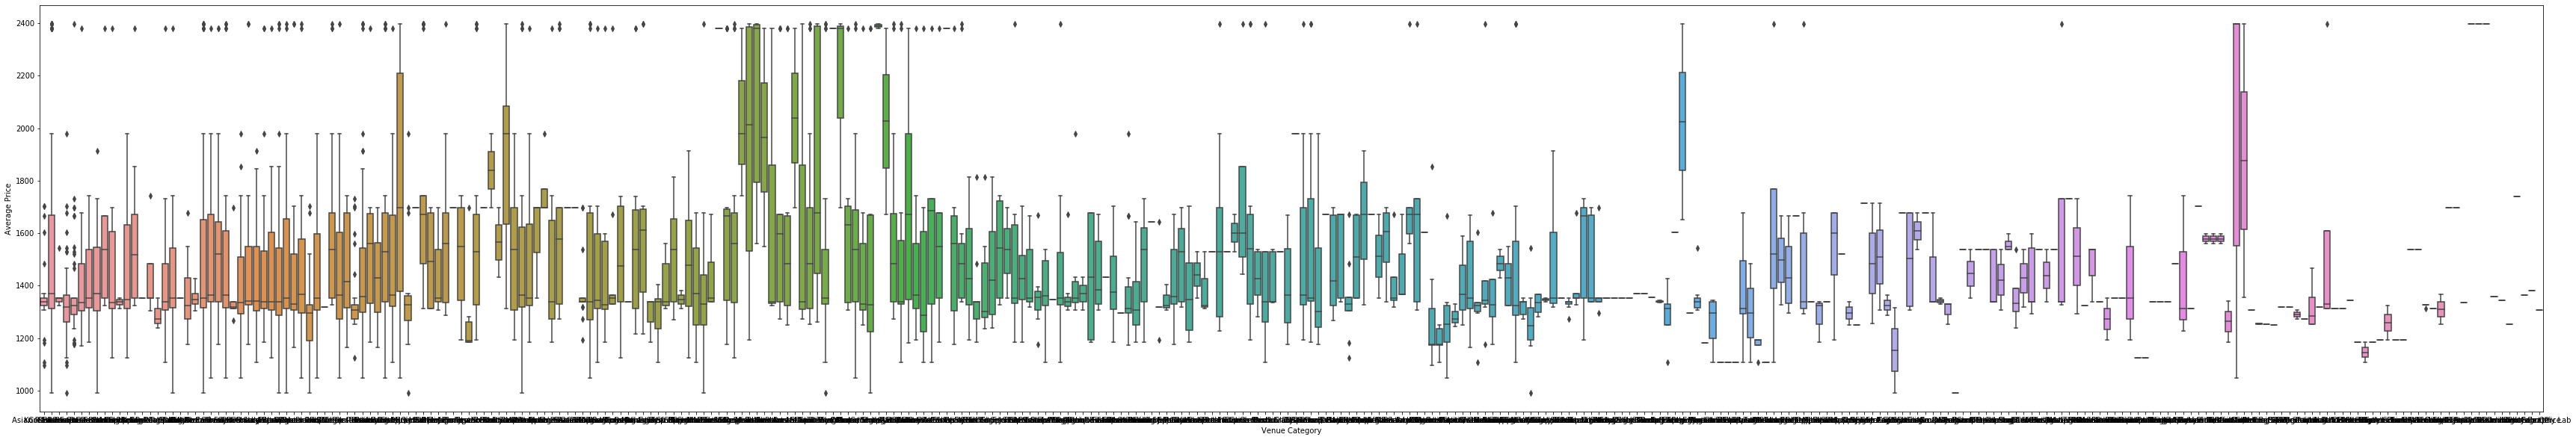

In [129]:
plt.figure(figsize=(60,10))
sns.boxplot(x='Venue Category', y='Average Price', data=gta_venues)

### Find the best K

In [130]:
gta_grouped_clustering = gta_grouped.drop(['Neighbourhoods', 'Average Price', 'Price Level'], 1)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(gta_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

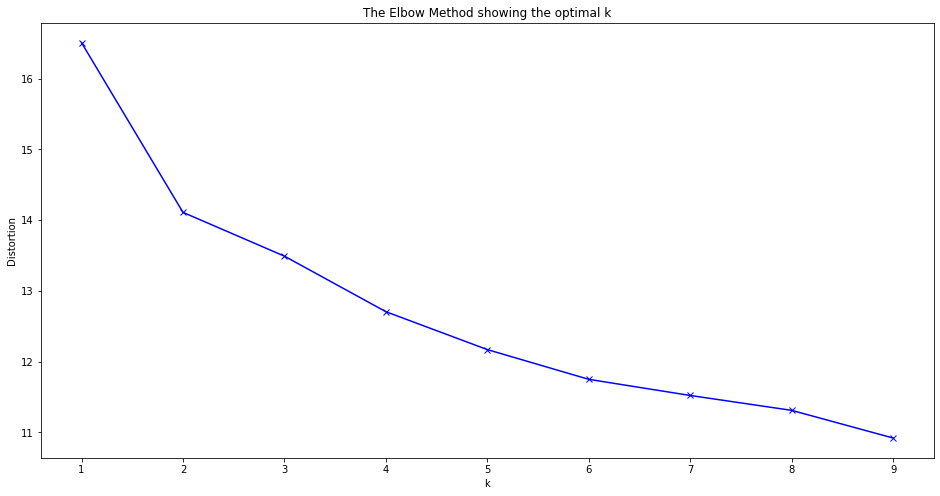

In [131]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [132]:
kclusters = 3

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(gta_grouped_clustering)

kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 1, 2, 0, 2, 0])

In [133]:
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_, allow_duplicates=True)

neighbourhoods_venues_sorted = neighbourhoods_venues_sorted.loc[:,~neighbourhoods_venues_sorted.columns.duplicated()]

gta_merged = df_gta

gta_merged = gta_merged.join(neighbourhoods_venues_sorted.set_index(['Neighbourhoods', 'Average Price', 'Price Level']), on=['Neighbourhoods', 'Average Price', 'Price Level'])

gta_merged

,Latitude,Longitude,Province,Centre,Zone,Neighbourhoods,Average Price,Price Level,Cluster Labels,Bus Station,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,43.788074,-79.283964,Ontario,Toronto,Scarborough,Agincourt,1352,Low-Mid Level-1,0,0,...,Chinese Restaurant,Food Court,Asian Restaurant,Cantonese Restaurant,Shopping Mall,Spa,Korean Restaurant,Beer Store,Gas Station,Big Box Store
1,43.850757,-79.021099,Ontario,Toronto,Ajax,Ajax,1318,Low-Mid Level-1,0,0,...,Mexican Restaurant,Breakfast Spot,Fried Chicken Joint,Beer Store,Bank,Grocery Store,Gym,Café,Fast Food Restaurant,Coffee Shop
2,43.604020,-79.540029,Ontario,Toronto,Etobicoke,Alderwood,1320,Low-Mid Level-1,0,0,...,Pizza Place,Sandwich Place,Print Shop,Pub,Gym,Coffee Shop,Falafel Restaurant,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant
3,43.670832,-79.404308,Ontario,Toronto,Toronto,Annex,1698,Mid Level-2,0,0,...,Coffee Shop,Italian Restaurant,Café,Pub,Sandwich Place,Bookstore,Restaurant,Grocery Store,Bakery,Vegetarian / Vegan Restaurant
4,44.006605,-79.449865,Ontario,Toronto,Aurora,Aurora,1338,Low-Mid Level-1,0,0,...,Bank,Bakery,Middle Eastern Restaurant,Gym Pool,Chinese Restaurant,Sandwich Place,Restaurant,Smoothie Shop,Seafood Restaurant,Coffee Shop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,43.677843,-79.420128,Ontario,Toronto,Toronto,Wychwood,1363,Low-Mid Level-1,0,0,...,Coffee Shop,Sushi Restaurant,Pizza Place,Burger Joint,Ice Cream Shop,Park,Intersection,Bakery,Café,Gym / Fitness Center
150,43.706754,-79.398287,Ontario,Toronto,Toronto,Yonge-Eglinton,1560,Mid Level-1,0,0,...,Coffee Shop,Italian Restaurant,Pizza Place,Sushi Restaurant,Café,Gym,Restaurant,Fast Food Restaurant,Pub,Bar
151,43.689790,-79.396941,Ontario,Toronto,Toronto,Yonge-St. Clair,1743,Mid Level-2,0,0,...,Coffee Shop,Italian Restaurant,Thai Restaurant,Sandwich Place,Sushi Restaurant,Grocery Store,Gym,Bank,Pizza Place,Pub
152,43.749239,-79.394071,Ontario,Toronto,North York,York Mills,1382,Low-Mid Level-1,2,0,...,Convenience Store,Sandwich Place,Supermarket,Park,Dentist's Office,Farm,Egyptian Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant


In [134]:
gta_merged.dropna(axis=0, inplace=True)
gta_merged.reset_index(drop=True, inplace=True)

In [135]:
gta_merged['Cluster Labels'] = gta_merged['Cluster Labels'].astype(int)

### The Cluster Result

In [136]:
map_clusters = folium.Map(location=[43.6532, -79.3832], zoom_start=9)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, price, pricelevel, cluster in zip(gta_merged['Latitude'], gta_merged['Longitude'], gta_merged['Neighbourhoods'], gta_merged['Average Price'], gta_merged['Price Level'], gta_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + " , " + str(pricelevel) + " , " + "$" + str(price) + ' , ' + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

### CLUSTER 0 : Coffee Shop & Pizza

In [137]:
cluster_0 = gta_merged.loc[gta_merged['Cluster Labels'] == 0,gta_merged.columns[[0] + [1] + list(range(5, gta_merged.shape[1]))]]
cluster_0.sort_values("Average Price", ascending=True)

,Latitude,Longitude,Neighbourhoods,Average Price,Price Level,Cluster Labels,Bus Station,Train Station,Light Rail Station,Metro Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
65,43.685496,-79.470394,Keelesdale-Eglinton West,991,Low Level-1,0,0,0,0,0,Coffee Shop,Pizza Place,Sandwich Place,Discount Store,Bakery,Thrift / Vintage Store,Beer Store,Bar,Department Store,Gas Station
96,43.599939,-79.509092,New Toronto,1048,Low Level-1,0,1,0,0,0,Pharmacy,Park,Coffee Shop,Concert Hall,Italian Restaurant,Pub,Dessert Shop,Restaurant,Scenic Lookout,Seafood Restaurant
51,43.674067,-79.324638,Greenwood-Coxwell,1107,Low Level-1,0,0,0,0,0,Indian Restaurant,Café,Grocery Store,Brewery,Park,Tibetan Restaurant,Track,Sandwich Place,Egyptian Restaurant,Bus Stop
79,43.592400,-79.533155,Long Branch,1126,Low Level-1,0,0,0,0,0,Café,Bank,Coffee Shop,Restaurant,Discount Store,South American Restaurant,Seafood Restaurant,Liquor Store,Sushi Restaurant,Garden Center
10,43.693289,-79.478617,Beechborough-Greenbrook,1170,Low Level-2,0,0,0,0,0,Convenience Store,Playground,Sandwich Place,Discount Store,Bar,Fishing Spot,Event Space,Egyptian Restaurant,Flower Shop,Electronics Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,43.689790,-79.396941,Yonge-St. Clair,1743,Mid Level-2,0,0,0,0,0,Coffee Shop,Italian Restaurant,Thai Restaurant,Sandwich Place,Sushi Restaurant,Grocery Store,Gym,Bank,Pizza Place,Pub
146,43.684326,-79.557642,Willowridge-Martingrove-Richview,1855,Mid-High Level-1,0,0,0,0,0,Bank,Pizza Place,Sandwich Place,Shopping Mall,Pharmacy,Bus Line,Liquor Store,Coffee Shop,Falafel Restaurant,Egyptian Restaurant
22,43.678309,-79.409771,Casa Loma,1980,Mid-High Level-2,0,0,0,0,0,Coffee Shop,History Museum,Café,Sandwich Place,Burger Joint,Vegetarian / Vegan Restaurant,Dessert Shop,Sports Bar,Breakfast Spot,Castle
7,43.656177,-79.383876,Bay Street Corridor,2382,High Level-2,0,0,0,0,0,Coffee Shop,Clothing Store,Café,Italian Restaurant,Ramen Restaurant,Bar,Theater,Bubble Tea Shop,Plaza,Department Store


In [138]:
cluster_0['1st Most Common Venue'].value_counts()

Coffee Shop             29
Pizza Place             10
Italian Restaurant       6
Bar                      6
Chinese Restaurant       5
Café                     5
Bank                     5
Pharmacy                 4
Grocery Store            4
Gas Station              3
Restaurant               3
Bakery                   3
Greek Restaurant         3
Fast Food Restaurant     2
Convenience Store        2
Indian Restaurant        2
Hotel                    2
Beach                    1
Storage Facility         1
Sandwich Place           1
Tennis Stadium           1
Sushi Restaurant         1
Soccer Field             1
Ice Cream Shop           1
Pet Store                1
Mexican Restaurant       1
Brewery                  1
Pool Hall                1
Intersection             1
Gym / Fitness Center     1
Temple                   1
Clothing Store           1
Name: 1st Most Common Venue, dtype: int64

### CLUSTER 1: Park

In [139]:
cluster_1 = gta_merged.loc[gta_merged['Cluster Labels'] == 1,gta_merged.columns[[0] + [1] + list(range(5, gta_merged.shape[1]))]] 
cluster_1.sort_values("Average Price", ascending=True)

,Latitude,Longitude,Neighbourhoods,Average Price,Price Level,Cluster Labels,Bus Station,Train Station,Light Rail Station,Metro Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,43.745722,-79.444778,Clanton Park,1246,Low Level-2,1,0,0,0,0,Park,Convenience Store,Other Great Outdoors,Flea Market,Fishing Spot,Eastern European Restaurant,Egyptian Restaurant,Flower Shop,Electronics Store,Elementary School
15,43.676944,-79.788046,Brampton (West),1315,Low-Mid Level-1,1,0,0,0,0,Park,Dog Run,Grocery Store,Yoga Studio,Farm,Egyptian Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space
80,43.540209,-79.617873,Lorne Park,1366,Low-Mid Level-1,1,0,0,0,0,Park,Pizza Place,Yoga Studio,Farmers Market,Egyptian Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant
5,43.744372,-79.362400,Banbury-Don Mills,1382,Low-Mid Level-1,1,0,0,0,0,Park,Pool,Tennis Court,Farm,Egyptian Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant
74,43.723102,-79.388346,Lawrence Park North,1424,Low-Mid Level-2,1,0,0,0,0,Park,Gym / Fitness Center,Bus Line,Yoga Studio,Farm,Egyptian Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space
11,43.763154,-79.249904,Bendale,1445,Low-Mid Level-2,1,0,0,0,0,Greek Restaurant,Park,History Museum,Farm,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space
40,43.670138,-79.521376,Edenbridge-Humber Valley,1445,Low-Mid Level-2,1,0,0,0,0,Park,Convenience Store,Skating Rink,Garden,Bakery,Farm,Egyptian Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant
99,43.785908,-79.430803,Newtonbrook West,1512,Low-Mid Level-2,1,0,0,0,0,Electronics Store,Wine Bar,Park,Yoga Studio,Farmers Market,Egyptian Restaurant,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant
145,43.770757,-79.429951,Willowdale West,1512,Low-Mid Level-2,1,0,0,0,0,Park,Mobile Phone Shop,Coffee Shop,Yoga Studio,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant
107,43.753130,-79.324873,Parkwoods-Donalda,1538,Low-Mid Level-2,1,0,0,0,0,Park,Food & Drink Shop,Caribbean Restaurant,Tennis Court,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space


In [140]:
cluster_1['1st Most Common Venue'].value_counts()

Park                          12
Construction & Landscaping     1
Greek Restaurant               1
Electronics Store              1
Name: 1st Most Common Venue, dtype: int64

### CLUSTER 2: Convenience Store & Park

In [141]:
cluster_2 = gta_merged.loc[gta_merged['Cluster Labels'] == 2,gta_merged.columns[[0] + [1] + list(range(5, gta_merged.shape[1]))]]
cluster_2.sort_values("Average Price", ascending=True)

,Latitude,Longitude,Neighbourhoods,Average Price,Price Level,Cluster Labels,Bus Station,Train Station,Light Rail Station,Metro Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
117,43.676207,-79.494215,Rockcliffe-Smythe,1096,Low Level-1,2,0,0,0,0,Park,Pizza Place,Convenience Store,Asian Restaurant,Supermarket,Beer Store,Bus Line,Coffee Shop,Elementary School,Ethiopian Restaurant
148,43.692469,-79.315704,Woodbine Corridor,1107,Low Level-1,2,0,0,0,1,Park,Smoke Shop,Convenience Store,Pizza Place,Spa,Curling Ice,Metro Station,Beer Store,Skating Rink,Athletics & Sports
104,43.691407,-79.331960,Old East York,1164,Low Level-2,2,0,0,0,0,Pizza Place,Park,Coffee Shop,Sandwich Place,Athletics & Sports,Café,Thai Restaurant,Ice Cream Shop,Pub,Farmers Market
114,43.724672,-79.572896,Rexdale-Kipling,1170,Low Level-2,2,0,0,0,0,Thrift / Vintage Store,Fast Food Restaurant,Sandwich Place,Discount Store,Park,Department Store,Coffee Shop,Pizza Place,Filipino Restaurant,Egyptian Restaurant
21,43.688828,-79.454338,Caledonia-Fairbank,1217,Low Level-2,2,0,0,0,0,Park,Cosmetics Shop,Pharmacy,Mexican Restaurant,Beer Store,Bakery,Gym,Japanese Restaurant,Grocery Store,Sporting Goods Shop
120,43.804893,-79.166012,Rouge,1221,Low Level-2,2,1,0,0,0,Intersection,Fast Food Restaurant,Park,Bus Station,Gas Station,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant
53,43.646951,-80.017647,Halton Hills,1239,Low Level-2,2,0,0,0,0,Home Service,Yoga Studio,Fast Food Restaurant,Egyptian Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm
108,43.710263,-79.522457,Pelmo Park,1251,Low Level-2,2,0,0,0,0,Outdoors & Recreation,Furniture / Home Store,Park,Food & Drink Shop,Fishing Spot,Fish Market,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Flower Shop
58,43.721350,-79.533155,Humberlea,1251,Low Level-2,2,0,0,0,0,Convenience Store,Park,Gas Station,Shop & Service,Lawyer,Baseball Field,Bakery,Construction & Landscaping,Deli / Bodega,Electronics Store
121,43.710707,-79.498195,Rustic,1251,Low Level-2,2,0,0,0,0,Convenience Store,Gas Station,Pizza Place,Vietnamese Restaurant,Egyptian Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant


In [142]:
cluster_2['1st Most Common Venue'].value_counts()

Park                      8
Convenience Store         8
Coffee Shop               3
Grocery Store             2
Home Service              1
Pizza Place               1
Thrift / Vintage Store    1
Outdoors & Recreation     1
Intersection              1
Train Station             1
Summer Camp               1
Fast Food Restaurant      1
Flower Shop               1
Name: 1st Most Common Venue, dtype: int64

### Checking Transport Stations for Cluster 0

In [143]:
cluster_0[cluster_0['Metro Station']==1]

,Latitude,Longitude,Neighbourhoods,Average Price,Price Level,Cluster Labels,Bus Station,Train Station,Light Rail Station,Metro Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,43.714769,-79.282161,Clairlea-Birchmount,1174,Low Level-2,0,1,0,0,1,Bakery,Bus Line,Intersection,Park,Pub,Bus Station,Beer Store,Metro Station,Coffee Shop,Flea Market
31,43.695920,-79.293593,Crescent Town,1236,Low Level-2,0,0,0,0,1,Chinese Restaurant,Burger Joint,Ice Cream Shop,Park,Metro Station,Pizza Place,Sushi Restaurant,Beer Store,Gas Station,Sandwich Place
32,43.689279,-79.296777,Danforth Village-East York,1176,Low Level-2,0,0,1,0,1,Grocery Store,Coffee Shop,Bank,Bus Line,Pizza Place,Chinese Restaurant,Pharmacy,Ice Cream Shop,Sandwich Place,Supermarket
43,43.718944,-79.437313,Englemount-Lawrence,1249,Low Level-2,0,0,0,0,1,Coffee Shop,Bank,Park,Breakfast Spot,Supermarket,Bus Stop,Sushi Restaurant,Liquor Store,Electronics Store,Sandwich Place


In [144]:
cluster_0[cluster_0['Bus Station']==1]

,Latitude,Longitude,Neighbourhoods,Average Price,Price Level,Cluster Labels,Bus Station,Train Station,Light Rail Station,Metro Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,43.714769,-79.282161,Clairlea-Birchmount,1174,Low Level-2,0,1,0,0,1,Bakery,Bus Line,Intersection,Park,Pub,Bus Station,Beer Store,Metro Station,Coffee Shop,Flea Market
41,43.739824,-79.242347,Eglinton East,1335,Low-Mid Level-1,0,1,0,0,0,Pharmacy,Sandwich Place,Grocery Store,Ice Cream Shop,Fast Food Restaurant,Beer Store,Rock Club,Bakery,Liquor Store,Coffee Shop
54,43.772204,-79.340895,Henry Farm,1666,Mid Level-1,0,1,0,0,0,Clothing Store,Coffee Shop,Restaurant,Japanese Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Sandwich Place,Chinese Restaurant,Food Court,Electronics Store
60,43.735459,-79.272437,Ionview,1288,Low-Mid Level-1,0,1,0,1,0,Pizza Place,Sandwich Place,Bus Line,Chinese Restaurant,Bank,Grocery Store,Light Rail Station,Coffee Shop,Bus Station,Discount Store
96,43.599939,-79.509092,New Toronto,1048,Low Level-1,0,1,0,0,0,Pharmacy,Park,Coffee Shop,Concert Hall,Italian Restaurant,Pub,Dessert Shop,Restaurant,Scenic Lookout,Seafood Restaurant


In [145]:
cluster_0[cluster_0['Train Station']==1]

,Latitude,Longitude,Neighbourhoods,Average Price,Price Level,Cluster Labels,Bus Station,Train Station,Light Rail Station,Metro Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,43.689279,-79.296777,Danforth Village-East York,1176,Low Level-2,0,0,1,0,1,Grocery Store,Coffee Shop,Bank,Bus Line,Pizza Place,Chinese Restaurant,Pharmacy,Ice Cream Shop,Sandwich Place,Supermarket
64,43.661642,-79.449536,Junction Triangle,1329,Low-Mid Level-1,0,0,1,0,0,Café,Coffee Shop,Pub,Portuguese Restaurant,Caribbean Restaurant,Grocery Store,Gym,Pharmacy,Park,Dive Bar
97,44.059066,-79.461153,Newmarket,1355,Low-Mid Level-1,0,0,1,0,0,Convenience Store,Pub,Lake,Gastropub,Train Station,Arts & Crafts Store,Sushi Restaurant,Sandwich Place,Mexican Restaurant,Fish & Chips Shop
112,43.551666,-79.585637,Port Credit,1318,Low-Mid Level-1,0,0,1,0,0,Bar,Coffee Shop,Harbor / Marina,Ice Cream Shop,Park,Sandwich Place,Cocktail Bar,Restaurant,Bank,Pizza Place
136,43.638000,-79.385000,Waterfront Communities -The Island,2398,High Level-2,0,0,1,0,0,Coffee Shop,Hotel,Aquarium,Café,Scenic Lookout,Baseball Stadium,Brewery,Park,Sporting Goods Shop,Fried Chicken Joint


In [146]:
cluster_0[cluster_0['Light Rail Station']==1]

,Latitude,Longitude,Neighbourhoods,Average Price,Price Level,Cluster Labels,Bus Station,Train Station,Light Rail Station,Metro Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
60,43.735459,-79.272437,Ionview,1288,Low-Mid Level-1,0,1,0,1,0,Pizza Place,Sandwich Place,Bus Line,Chinese Restaurant,Bank,Grocery Store,Light Rail Station,Coffee Shop,Bus Station,Discount Store
149,43.677843,-79.420128,Wychwood,1363,Low-Mid Level-1,0,0,0,1,0,Coffee Shop,Sushi Restaurant,Pizza Place,Burger Joint,Ice Cream Shop,Park,Intersection,Bakery,Café,Gym / Fitness Center


### Checking Transport Stations for Cluster 1

In [147]:
cluster_1[cluster_1['Metro Station']==1]

,Latitude,Longitude,Neighbourhoods,Average Price,Price Level,Cluster Labels,Bus Station,Train Station,Light Rail Station,Metro Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [148]:
cluster_1[cluster_1['Bus Station']==1]

,Latitude,Longitude,Neighbourhoods,Average Price,Price Level,Cluster Labels,Bus Station,Train Station,Light Rail Station,Metro Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [149]:
cluster_1[cluster_1['Train Station']==1]

,Latitude,Longitude,Neighbourhoods,Average Price,Price Level,Cluster Labels,Bus Station,Train Station,Light Rail Station,Metro Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [150]:
cluster_1[cluster_1['Light Rail Station']==1]

,Latitude,Longitude,Neighbourhoods,Average Price,Price Level,Cluster Labels,Bus Station,Train Station,Light Rail Station,Metro Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


#### Checking Transport Stations for Cluster 2

In [151]:
cluster_2[cluster_2['Metro Station']==1]

,Latitude,Longitude,Neighbourhoods,Average Price,Price Level,Cluster Labels,Bus Station,Train Station,Light Rail Station,Metro Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
148,43.692469,-79.315704,Woodbine Corridor,1107,Low Level-1,2,0,0,0,1,Park,Smoke Shop,Convenience Store,Pizza Place,Spa,Curling Ice,Metro Station,Beer Store,Skating Rink,Athletics & Sports


In [152]:
cluster_2[cluster_2['Bus Station']==1]

,Latitude,Longitude,Neighbourhoods,Average Price,Price Level,Cluster Labels,Bus Station,Train Station,Light Rail Station,Metro Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
120,43.804893,-79.166012,Rouge,1221,Low Level-2,2,1,0,0,0,Intersection,Fast Food Restaurant,Park,Bus Station,Gas Station,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant


In [153]:
cluster_2[cluster_2['Train Station']==1]

,Latitude,Longitude,Neighbourhoods,Average Price,Price Level,Cluster Labels,Bus Station,Train Station,Light Rail Station,Metro Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [154]:
cluster_2[cluster_2['Light Rail Station']==1]

,Latitude,Longitude,Neighbourhoods,Average Price,Price Level,Cluster Labels,Bus Station,Train Station,Light Rail Station,Metro Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


### Create final table of most desirable locations to setup Office

In [155]:
choice = cluster_0[cluster_0['Metro Station']==1]
choice = choice.merge(cluster_0[cluster_0['Bus Station']==1], how='outer')
choice = choice.merge(cluster_0[cluster_0['Train Station']==1], how='outer')
choice = choice.merge(cluster_0[cluster_0['Light Rail Station']==1], how='outer')
choice = choice.merge(cluster_2[cluster_2['Metro Station']==1], how='outer')
choice = choice.merge(cluster_2[cluster_2['Bus Station']==1], how='outer')
choice = choice[choice['Price Level'].str.contains('Low')]
choice

,Latitude,Longitude,Neighbourhoods,Average Price,Price Level,Cluster Labels,Bus Station,Train Station,Light Rail Station,Metro Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,43.714769,-79.282161,Clairlea-Birchmount,1174,Low Level-2,0,1,0,0,1,Bakery,Bus Line,Intersection,Park,Pub,Bus Station,Beer Store,Metro Station,Coffee Shop,Flea Market
1,43.695920,-79.293593,Crescent Town,1236,Low Level-2,0,0,0,0,1,Chinese Restaurant,Burger Joint,Ice Cream Shop,Park,Metro Station,Pizza Place,Sushi Restaurant,Beer Store,Gas Station,Sandwich Place
2,43.689279,-79.296777,Danforth Village-East York,1176,Low Level-2,0,0,1,0,1,Grocery Store,Coffee Shop,Bank,Bus Line,Pizza Place,Chinese Restaurant,Pharmacy,Ice Cream Shop,Sandwich Place,Supermarket
3,43.718944,-79.437313,Englemount-Lawrence,1249,Low Level-2,0,0,0,0,1,Coffee Shop,Bank,Park,Breakfast Spot,Supermarket,Bus Stop,Sushi Restaurant,Liquor Store,Electronics Store,Sandwich Place
4,43.739824,-79.242347,Eglinton East,1335,Low-Mid Level-1,0,1,0,0,0,Pharmacy,Sandwich Place,Grocery Store,Ice Cream Shop,Fast Food Restaurant,Beer Store,Rock Club,Bakery,Liquor Store,Coffee Shop
6,43.735459,-79.272437,Ionview,1288,Low-Mid Level-1,0,1,0,1,0,Pizza Place,Sandwich Place,Bus Line,Chinese Restaurant,Bank,Grocery Store,Light Rail Station,Coffee Shop,Bus Station,Discount Store
7,43.599939,-79.509092,New Toronto,1048,Low Level-1,0,1,0,0,0,Pharmacy,Park,Coffee Shop,Concert Hall,Italian Restaurant,Pub,Dessert Shop,Restaurant,Scenic Lookout,Seafood Restaurant
8,43.661642,-79.449536,Junction Triangle,1329,Low-Mid Level-1,0,0,1,0,0,Café,Coffee Shop,Pub,Portuguese Restaurant,Caribbean Restaurant,Grocery Store,Gym,Pharmacy,Park,Dive Bar
9,44.059066,-79.461153,Newmarket,1355,Low-Mid Level-1,0,0,1,0,0,Convenience Store,Pub,Lake,Gastropub,Train Station,Arts & Crafts Store,Sushi Restaurant,Sandwich Place,Mexican Restaurant,Fish & Chips Shop
10,43.551666,-79.585637,Port Credit,1318,Low-Mid Level-1,0,0,1,0,0,Bar,Coffee Shop,Harbor / Marina,Ice Cream Shop,Park,Sandwich Place,Cocktail Bar,Restaurant,Bank,Pizza Place


### Map the desirable locations

In [156]:
choice_map = folium.Map(location=[43.6532, -79.3832], zoom_start=9)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, price, pricelevel, cluster in zip(choice['Latitude'], choice['Longitude'], choice['Neighbourhoods'], choice['Average Price'], choice['Price Level'], choice['Cluster Labels']):
    label = folium.Popup(str(poi) + " , " + str(pricelevel) + " , " + "$" + str(price) + ' , ' + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(choice_map)

choice_map